In [72]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcdefaults()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# from pylab import rcParams
plt.rcParams['figure.figsize'] = 17, 15
plt.rcParams.update({'font.size': 18})

params = {"text.color" : "black",
          "xtick.color" : (0.9, 0.9, 0.9),
          "ytick.color" : (0.9, 0.9, 0.9)}
plt.rcParams.update(params)

markerSize = 12

# 1) Courbe (embedding dim,score privé)

In [57]:
## LSTM

# GloVe Twitter
dims_lstm_twitter = [25,50,100,200]
scores_lstm_twitter = [0.9757,0.9794,0.9805,0.9804]

# GloVe 6B Giga 5 + Wiki
dims_lstm_gigaWiki = [50,100,200,300]
scores_lstm_gigaWiki= [0.9780,0.9788,0.9803,0.9786]

# Non pre-trained embeddings, same architecture (bidir. LSTM)
dims_lstm = [25,50,100,150,200,300]
scores_lstm = [0.9681,0.9691,0.9685,0.9726,0.9746,0.9729]

## Yoon Kim

# Non pre-trained embeddings, real YK architecture
dims_yk = dims_lstm
scores_yk = [0.9753,0.9759,0.9757,0.9764,0.9750,0.9757]

# GloVe 6B Giga 5 + Wiki
# after change in preprocessing ?!
dims_yk_gigaWiki = [50,100,200,300]
scores_yk_gigaWiki = [0.9784,0.9781,0.9758,0.9753]

# GloVe Twitter
# after change in preprocessing ?!
dims_yk_twitter = [25,50,100,200]
scores_yk_twitter = [0.9722,0.9783,0.9776,0.9761]

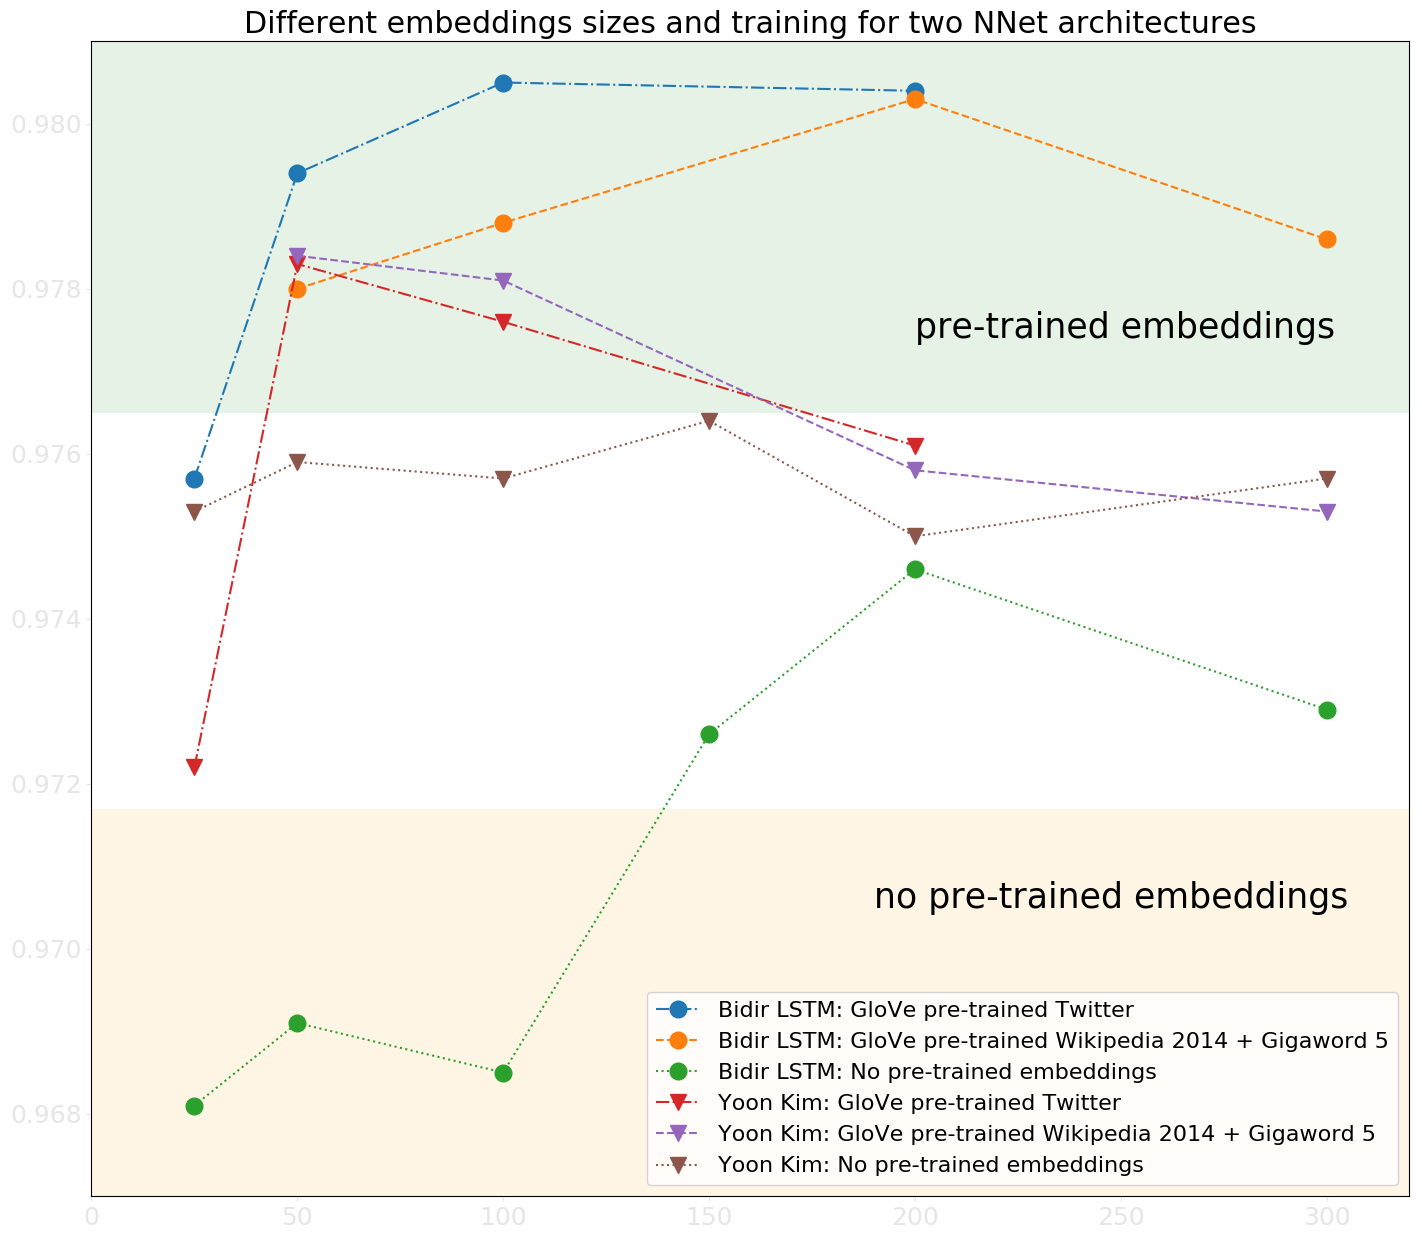

In [58]:
plt.plot(dims_lstm_twitter,scores_lstm_twitter,'o-.',markersize=markerSize)
plt.plot(dims_lstm_gigaWiki,scores_lstm_gigaWiki,'o--',markersize=markerSize)
plt.plot(dims_lstm,scores_lstm,'o:',markersize=markerSize)

plt.plot(dims_yk_twitter,scores_yk_twitter,'v-.',markersize=markerSize)
plt.plot(dims_yk_gigaWiki,scores_yk_gigaWiki,'v--',markersize=markerSize)
plt.plot(dims_yk,scores_yk,'v:',markersize=markerSize)

plt.legend(('Bidir LSTM: GloVe pre-trained Twitter',
            'Bidir LSTM: GloVe pre-trained Wikipedia 2014 + Gigaword 5',
            'Bidir LSTM: No pre-trained embeddings',
            'Yoon Kim: GloVe pre-trained Twitter',
            'Yoon Kim: GloVe pre-trained Wikipedia 2014 + Gigaword 5',
            'Yoon Kim: No pre-trained embeddings'),loc='lower right',fontsize=16)

plt.title('Different embeddings sizes and training for two NNet architectures')

# plt.axis([xmin,xmax,ymin,ymax])
plt.axis([0,320,0.967,0.981])
#plt.grid()
plt.axhspan(0.9765, 0.99, facecolor='green', alpha=0.1)
plt.text(200,0.9774,"pre-trained embeddings",fontsize=25)
plt.axhspan(0.96, 0.9717, facecolor='orange', alpha=0.1)
plt.text(190,0.9705,"no pre-trained embeddings",fontsize=25)
         
plt.savefig('courbes_emb.png', transparent=True)
plt.show()

# Some illustration of best (diverse classifiers) scores

https://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points

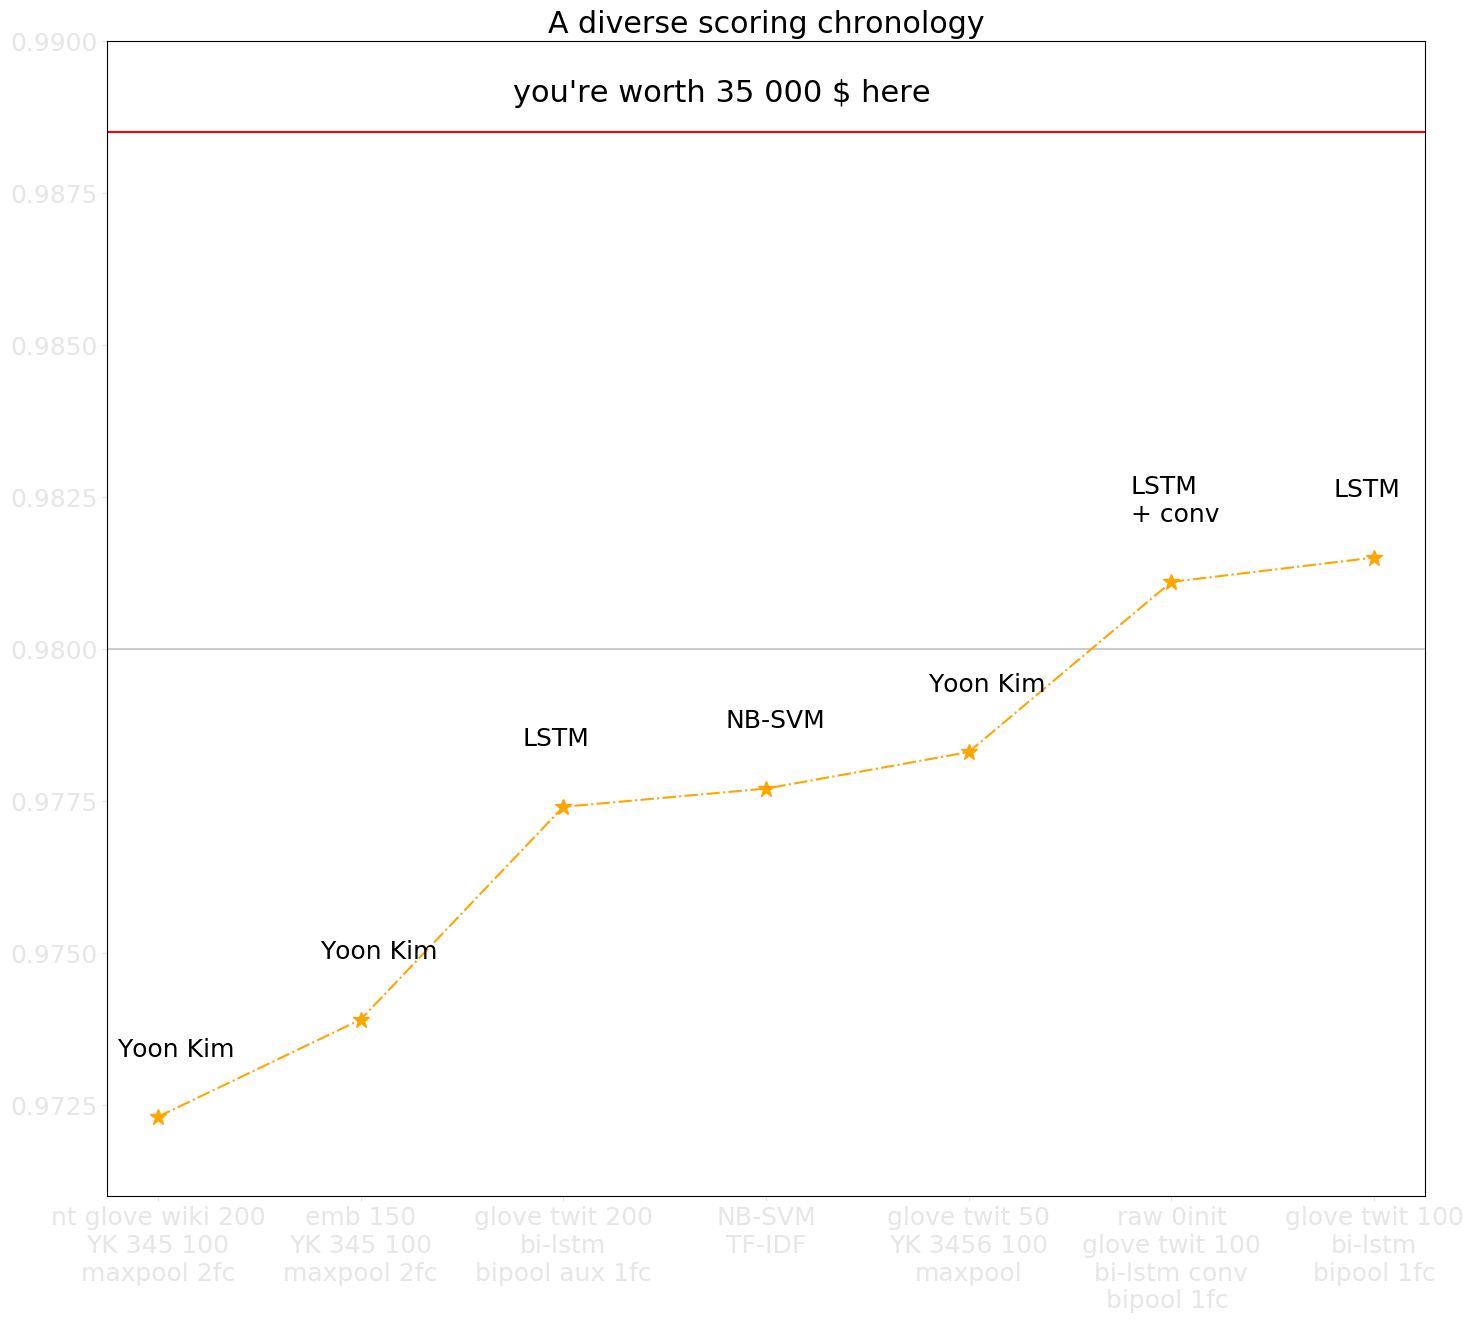

In [88]:
fig = plt.figure()
x = np.arange(7) + 0.25
bestScores = [0.9723, 0.9739, 0.9774,0.9777,0.9783,0.9811,0.9815]
labels = ["Yoon Kim", "Yoon Kim", "LSTM", "NB-SVM", "Yoon Kim", "LSTM\n+ conv", "LSTM"]

my_xticks = ['nt glove wiki 200\nYK 345 100\nmaxpool 2fc',
             'emb 150\nYK 345 100\nmaxpool 2fc',
             'glove twit 200\nbi-lstm\nbipool aux 1fc',\
             'NB-SVM\nTF-IDF',\
             'glove twit 50\nYK 3456 100\nmaxpool',\
             'raw 0init\nglove twit 100\nbi-lstm conv\nbipool 1fc ',\
             'glove twit 100\nbi-lstm\nbipool 1fc']

plt.axis([0,6.5,0.971,0.99])
plt.axhline(y=0.9885, color='r', linestyle='-')
plt.axhline(y=0.98, color='gray', linestyle='-',alpha=0.4)
plt.text(2,0.989,"you're worth 35 000 $ here",fontsize=22)


for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], bestScores[i]),(x[i]-0.2, bestScores[i]+0.001))

plt.title('A diverse scoring chronology')

plt.xticks(x, my_xticks)
plt.plot(x, bestScores,'.-.', color="orange", marker='*',markersize=markerSize)

plt.savefig('chronology.png', transparent=True)

plt.show()